In [2]:
# Create function to import and combine TSV data files
import pandas as pd

def process_file(file_path):
    
    chunk_size = 50000
    processed_data = []
    
    # Create review length column and drop review body to save memory
    for chunk in pd.read_csv(file_path, sep='\t', chunksize=chunk_size, error_bad_lines=False):
        chunk['review_length'] = chunk['review_body'].str.len()
        chunk.drop(columns=['review_body'], inplace=True)
        processed_data.append(chunk)
    
    final_df = pd.concat(processed_data, axis=0, ignore_index=True)
    
    return final_df

# Store processed DFs in a list
all_dataframes = []

# Execute func
file_paths = [(r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Outdoors_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Furniture_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Automotive_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Major_Appliances_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Office_Products_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Tools_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Camera_v1_00.tsv"), ]  # Add paths as needed
for path in file_paths:
    df = process_file(path)
    all_dataframes.append(df)

# Combine DFs
combined_df = pd.concat(all_dataframes, axis=0, ignore_index=True)


C:\Users\willf\AppData\Local\Temp\ipykernel_22236\1506344098.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  for chunk in pd.read_csv(file_path, sep='\t', chunksize=chunk_size, error_bad_lines=False):
b'Skipping line 3121: expected 15 fields, saw 22\nSkipping line 23098: expected 15 fields, saw 22\nSkipping line 44261: expected 15 fields, saw 22\nSkipping line 46415: expected 15 fields, saw 22\nSkipping line 49691: expected 15 fields, saw 22\n'
b'Skipping line 53219: expected 15 fields, saw 22\nSkipping line 76042: expected 15 fields, saw 22\nSkipping line 94032: expected 15 fields, saw 22\n'
b'Skipping line 114699: expected 15 fields, saw 22\nSkipping line 125796: expected 15 fields, saw 22\n'
b'Skipping line 157739: expected 15 fields, saw 22\nSkipping line 175898: expected 15 fields, saw 22\nSkipping line 177167: expected 15 fields, saw 22\nSkipping line 192248: expected 15 fields, sa

In [3]:
#Quick check to confirm data looks correct
combined_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date,review_length
0,US,18446823,R35T75OLUGHL5C,B000NV6H94,110804376,Stearns Youth Boating Vest (50-90 lbs.),Outdoors,4,0.0,0.0,N,Y,Four Stars,2015-08-31,10.0
1,US,13724367,R2BV735O46BN33,B000IN0W3Y,624096774,Primal Wear Men's Pink Floyd Dark Side of The ...,Outdoors,5,0.0,0.0,N,Y,Five Stars,2015-08-31,18.0
2,US,51001958,R2NBEUGPQQGXP1,B008RBJXFM,278970944,Osprey Hydraulics Reservoir,Outdoors,4,0.0,0.0,N,Y,Only Flaw Is The Cap,2015-08-31,1684.0
3,US,32866903,R17LLAOJ8ITK0S,B00FK8WUQY,312877650,CamelBak eddy .75L Water Bottle,Outdoors,3,1.0,1.0,N,Y,Poor design leads to frequent mildew.,2015-08-31,152.0
4,US,30907790,R39PEQBT5ISEF4,B00EZA3VW0,305567912,Children Black Red Striped Plastic Housing Ska...,Outdoors,1,0.0,0.0,N,Y,"Very bad quality, clips was broken when it arr...",2015-08-31,178.0


In [4]:
# OPTIMIZING DF SIZE

import numpy as np

# Change star rating to numeric only
combined_df = combined_df[combined_df['star_rating'].apply(lambda x: str(x).isnumeric())]

# optimize by ensuring correct data, dropping n/a, removing unneeded columns,  etc.
def optimize_df(df):
    if 'review_length' not in df.columns:
        raise ValueError("The 'review_length' column is missing from the dataframe.")
    df.dropna(subset=['review_length', 'star_rating'], inplace=True)
    df['review_length'] = df['review_length'].astype(int)
    df.drop(columns=['marketplace'], inplace=True)
    
    # Convert data types
    df['customer_id'] = df['customer_id'].astype('int32')
    df['product_parent'] = df['product_parent'].astype('int32')
    df['product_category'] = df['product_category'].astype('category')
    df['star_rating'] = df['star_rating'].astype('float16')
    df['helpful_votes'] = df['helpful_votes'].astype('float16')
    df['total_votes'] = df['total_votes'].astype('float16')
    df['vine'] = (df['vine'] == 'Y').astype(bool)
    df['verified_purchase'] = (df['verified_purchase'] == 'Y').astype(bool)
    df['review_date'] = pd.to_datetime(df['review_date'])

    return df

# Optimize DF
optimized_df = optimize_df(combined_df.copy())

# Confirm
optimized_df.head()


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date,review_length
0,18446823,R35T75OLUGHL5C,B000NV6H94,110804376,Stearns Youth Boating Vest (50-90 lbs.),Outdoors,4.0,0.0,0.0,False,True,Four Stars,2015-08-31,10
1,13724367,R2BV735O46BN33,B000IN0W3Y,624096774,Primal Wear Men's Pink Floyd Dark Side of The ...,Outdoors,5.0,0.0,0.0,False,True,Five Stars,2015-08-31,18
2,51001958,R2NBEUGPQQGXP1,B008RBJXFM,278970944,Osprey Hydraulics Reservoir,Outdoors,4.0,0.0,0.0,False,True,Only Flaw Is The Cap,2015-08-31,1684
3,32866903,R17LLAOJ8ITK0S,B00FK8WUQY,312877650,CamelBak eddy .75L Water Bottle,Outdoors,3.0,1.0,1.0,False,True,Poor design leads to frequent mildew.,2015-08-31,152
4,30907790,R39PEQBT5ISEF4,B00EZA3VW0,305567912,Children Black Red Striped Plastic Housing Ska...,Outdoors,1.0,0.0,0.0,False,True,"Very bad quality, clips was broken when it arr...",2015-08-31,178


In [5]:
# Further optimization for review_length col
optimized_df['review_length'].fillna(0, inplace=True)
optimized_df['review_length'] = optimized_df['review_length'].astype(int)

In [6]:
optimized_df.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date,review_length
0,18446823,R35T75OLUGHL5C,B000NV6H94,110804376,Stearns Youth Boating Vest (50-90 lbs.),Outdoors,4.0,0.0,0.0,False,True,Four Stars,2015-08-31,10
1,13724367,R2BV735O46BN33,B000IN0W3Y,624096774,Primal Wear Men's Pink Floyd Dark Side of The ...,Outdoors,5.0,0.0,0.0,False,True,Five Stars,2015-08-31,18
2,51001958,R2NBEUGPQQGXP1,B008RBJXFM,278970944,Osprey Hydraulics Reservoir,Outdoors,4.0,0.0,0.0,False,True,Only Flaw Is The Cap,2015-08-31,1684
3,32866903,R17LLAOJ8ITK0S,B00FK8WUQY,312877650,CamelBak eddy .75L Water Bottle,Outdoors,3.0,1.0,1.0,False,True,Poor design leads to frequent mildew.,2015-08-31,152
4,30907790,R39PEQBT5ISEF4,B00EZA3VW0,305567912,Children Black Red Striped Plastic Housing Ska...,Outdoors,1.0,0.0,0.0,False,True,"Very bad quality, clips was broken when it arr...",2015-08-31,178


c:\Users\willf\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


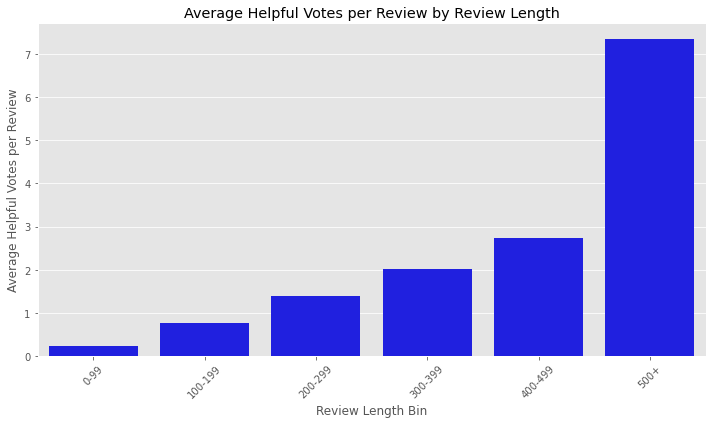

In [7]:
# Create Helpful Votes per Review Length Bucket Chart
import seaborn as sns
import matplotlib.pyplot as plt

# Divide review length (Characters) into bins
bins = [0, 99, 199, 299, 399, 499, float('inf')]
labels = ['0-99', '100-199', '200-299', '300-399', '400-499', '500+']
optimized_df['review_length_bin'] = pd.cut(optimized_df['review_length'], bins=bins, labels=labels)

# Calc mean helpful votes per bin
grouped = optimized_df.groupby('review_length_bin')['helpful_votes'].mean().reset_index()

# Plot
plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
sns.barplot(x='review_length_bin', y='helpful_votes', data=grouped, color='blue')
plt.title('Average Helpful Votes per Review by Review Length')
plt.xlabel('Review Length Bin')
plt.ylabel('Average Helpful Votes per Review')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
filtered_df = optimized_df.groupby('product_id').filter(lambda x: (x['vine'] == 'Y').sum() > 10 and len(x) > 100)
filtered_df.shape[0]

0

In [9]:
# Count prods with over 100 reviews and those with over 10 Vine reviews
product_counts = optimized_df.groupby('product_id').size()
vine_counts = optimized_df[optimized_df['vine'] == True].groupby('product_id').size()

products_over_100 = product_counts[product_counts > 100]
products_over_10_vine = vine_counts[vine_counts > 10]
print(f"Number of products with more than 100 reviews: {len(products_over_100)}")
print(f"Number of products with more than 10 vine reviews: {len(products_over_10_vine)}")

Number of products with more than 100 reviews: 15393
Number of products with more than 10 vine reviews: 1685


In [10]:
products_over_100.head()

product_id
0439893577    176
0528959948    230
0739007432    130
098949232X    185
0989528391    172
dtype: int64

In [11]:
# Setup for comparing vine vs non-vine avg rating distributions
# Start by creating a DF to see products with over 100 total reviews and 10 vine reviews 
total_reviews = optimized_df.groupby('product_id').size()
vine_reviews = optimized_df[optimized_df['vine'] == True].groupby('product_id').size()

review_counts = pd.DataFrame({'total_reviews': total_reviews, 'vine_reviews': vine_reviews}).fillna(0)

valid_products = review_counts[(review_counts['total_reviews'] > 100) & (review_counts['vine_reviews'] > 10)].index

filtered_products = optimized_df[optimized_df['product_id'].isin(valid_products)]

# Get avg star rating 
grouped = filtered_products.groupby(['product_id', 'vine'])['star_rating'].mean().unstack()

# Renaming for clarity
grouped.columns = ['non_vine_avg_rating', 'vine_avg_rating']

# Calculate the percentage difference between vine-reviews avg rating per prod and non-vine-reviews avg rating per prod
grouped = grouped.dropna()
grouped['percentage_change'] = ((grouped['vine_avg_rating'] - grouped['non_vine_avg_rating']) / grouped['non_vine_avg_rating']) * 100
grouped = grouped.reset_index()
grouped.head()

,product_id,non_vine_avg_rating,vine_avg_rating,percentage_change
0,B00002ND61,3.296875,4.464844,35.437500
1,B00005C55O,4.433594,3.550781,-19.906250
2,B00006IAT6,3.572266,3.833984,7.324219
3,B00006IDM7,4.468750,4.421875,-1.048828
4,B00006IDMJ,4.238281,4.500000,6.171875


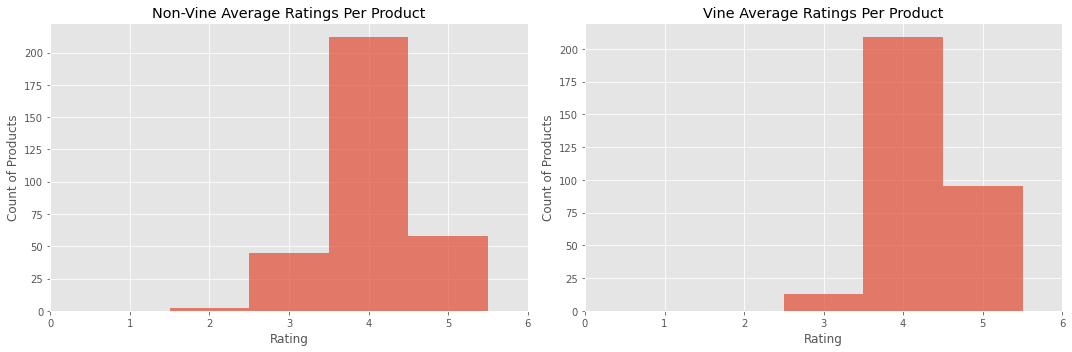

In [12]:
#Create histogram to compare vine vs non-vine avg ratings per product
import matplotlib.pyplot as plt
bins = [i - 0.5 for i in range(1, 8)]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(grouped['non_vine_avg_rating'].dropna(), bins=bins, alpha=0.7)
plt.title('Non-Vine Average Ratings Per Product')
plt.xlim(0, 6)
plt.xlabel('Rating')
plt.ylabel('Count of Products')

plt.subplot(1, 2, 2)
plt.hist(grouped['vine_avg_rating'].dropna(), bins=bins, alpha=0.7)
plt.title('Vine Average Ratings Per Product')
plt.xlim(0, 6)
plt.xlabel('Rating')
plt.ylabel('Count of Products')

plt.tight_layout()
plt.show()


In [13]:
# Now we want to look at if all products have a similar J-Shape curve and if that J-shape gets more or less similar as reviews increase
df_review_no = optimized_df.groupby('product_id')['review_id'].count().reset_index()
df_review_no.columns = ['product_id', 'review_count']

# Create review-count bins
bins = [50 * i for i in range(0, 101)] 

# Put product in appropriate bin
df_review_no['bin'] = pd.cut(df_review_no['review_count'], bins=bins, right=False)

# Count products per bin
bin_counts = df_review_no['bin'].value_counts().sort_index().reset_index()
bin_counts.columns = ['Review Count Range', 'Number of Products']

print(bin_counts)


   Review Count Range  Number of Products
0             [0, 50)             1821844
1           [50, 100)               21872
2          [100, 150)                6650
3          [150, 200)                3177
4          [200, 250)                1717
..                ...                 ...
95       [4750, 4800)                   1
96       [4800, 4850)                   0
97       [4850, 4900)                   0
98       [4900, 4950)                   0
99       [4950, 5000)                   0

[100 rows x 2 columns]


In [14]:
# Create review bins column in optimized df 
optimized_df['review_bin'] = optimized_df['product_id'].map(df_review_no.set_index('product_id')['bin'])

# Calc the star rating distribution for each bin
rating_distribution = optimized_df.groupby(['review_bin', 'star_rating']).size().unstack().fillna(0)

# Convert to percentages
rating_distribution_percentage = rating_distribution.divide(rating_distribution.sum(axis=1), axis=0) * 100

print(rating_distribution_percentage)


star_rating         1.0       2.0       3.0        4.0        5.0
review_bin                                                       
[0, 50)        9.426827  4.904285  7.656850  16.422465  61.589574
[50, 100)      8.301360  4.621863  7.500462  17.282644  62.293670
[100, 150)     8.339587  4.620859  7.328494  17.309585  62.401475
[150, 200)     7.976443  4.449850  7.178835  17.438730  62.956142
[200, 250)     7.764179  4.378968  7.128290  17.353037  63.375525
...                 ...       ...       ...        ...        ...
[4750, 4800)  18.589474  8.400000  7.852632  17.178947  47.978947
[4800, 4850)        NaN       NaN       NaN        NaN        NaN
[4850, 4900)        NaN       NaN       NaN        NaN        NaN
[4900, 4950)        NaN       NaN       NaN        NaN        NaN
[4950, 5000)        NaN       NaN       NaN        NaN        NaN

[100 rows x 5 columns]


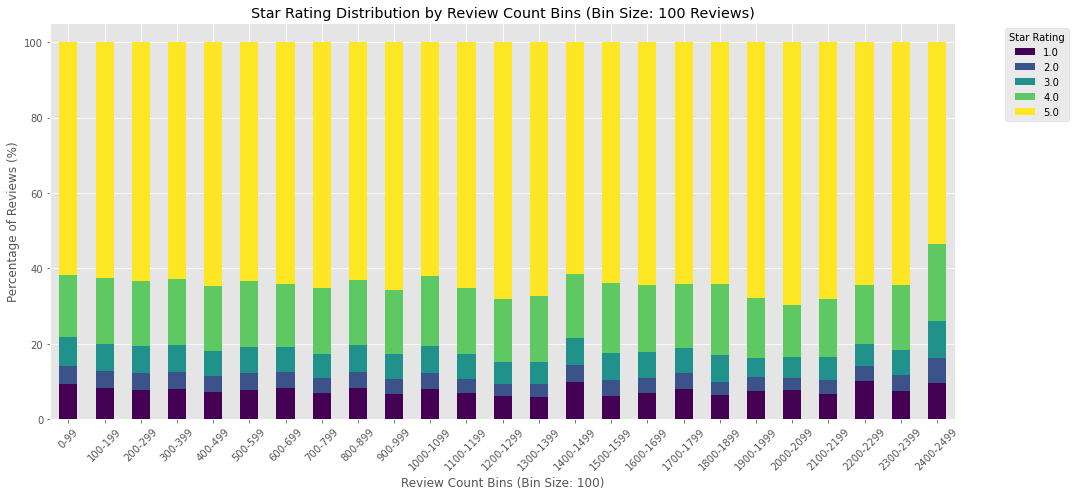

In [15]:
# Plot stacked bar showing star-rating distribution per bin of review-count

# Create review count bins and add column
bin_size = 100
bin_labels = [f'{i}-{i+bin_size-1}' for i in range(0, 2500, bin_size)]
bins = [i for i in range(0, 2600, bin_size)] 
optimized_df['review_count_bin'] = pd.cut(optimized_df.groupby('product_id')['review_id'].transform('size'), bins=bins, labels=bin_labels, right=False)

# Calc star rating distribution per bin
rating_distribution = optimized_df.groupby(['review_count_bin', 'star_rating']).size().unstack().fillna(0)
rating_distribution_percentage = (rating_distribution.T / rating_distribution.sum(axis=1)).T * 100

# Plot
ax = rating_distribution_percentage.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='viridis')

plt.title(f'Star Rating Distribution by Review Count Bins (Bin Size: {bin_size} Reviews)')
plt.ylabel('Percentage of Reviews (%)')
plt.xlabel(f'Review Count Bins (Bin Size: {bin_size})')
plt.xticks(rotation=45)
plt.legend(title="Star Rating", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


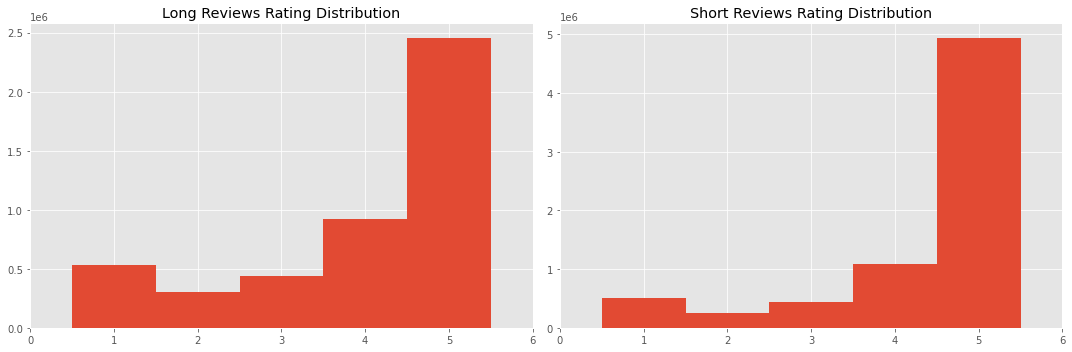

In [21]:
# Looking at rating distribution of long vs short reviews

# Create new DFs for long vs short review lengths
optimized_df_length = optimized_df.dropna(subset=['review_length'])
df_long = optimized_df_length[optimized_df_length['review_length']>200]
df_short = optimized_df_length[optimized_df_length['review_length']<=200]

# Plot
bins = [i - 0.5 for i in range(1, 8)]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df_long['star_rating'], bins=bins)
plt.title('Long Reviews Rating Distribution')
plt.xlim(0,6)

plt.subplot(1,2,2)
plt.hist(df_short['star_rating'], bins=bins)
plt.title('Short Reviews Rating Distribution')
plt.xlim(0,6)

plt.tight_layout()
plt.show()

   cumulative_average  cumulative_std
0            4.345886        0.000000
1            4.324255        0.443021
2            4.306132        0.618083
3            4.293290        0.715767
4            4.283716        0.780331


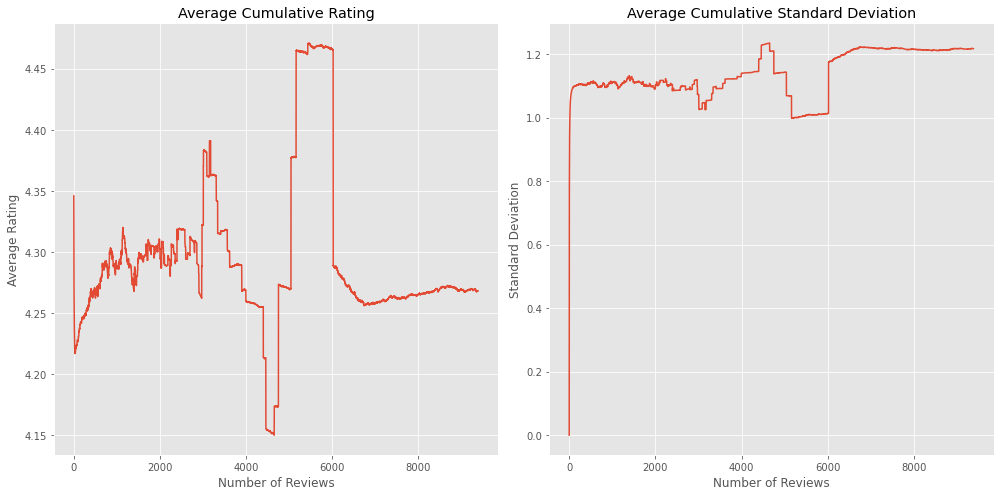

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = combined_df.copy()

# Convert star_rating to numeric and remove any invalid rows
df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')
df = df.dropna(subset=['star_rating'])

# Sort the dataframe by product_id and review_date
df = df.sort_values(by=['product_id', 'review_date'])

# Group and aggregate functions
df_prod = df.groupby('product_id').agg({
    'review_id': 'count',
    'star_rating': list
}).reset_index()

# Filter products having at least a certain number of reviews (e.g., 25)
min_reviews_threshold = 25
df_prod = df_prod[df_prod['review_id'] >= min_reviews_threshold]

# Calculate the cumulative average and standard deviation for each product
df_prod['cumulative_average'] = df_prod['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
df_prod['cumulative_std'] = df_prod['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))

# ... [the code above remains unchanged until after calculating cumulative statistics for each product]
max_len = df_prod['cumulative_average'].apply(len).max()

# Initialize arrays to accumulate the sum and the count of ratings for each position
cumulative_average_sum = np.zeros(max_len)
cumulative_std_sum = np.zeros(max_len)
cumulative_count = np.zeros(max_len, dtype=int)

# Accumulate the sum and count of ratings for each position across products
for index, row in df_prod.iterrows():
    lengths = len(row['cumulative_average'])
    cumulative_average_sum[:lengths] += row['cumulative_average']
    cumulative_std_sum[:lengths] += row['cumulative_std']
    cumulative_count[:lengths] += 1

# Calculate the average by dividing the accumulated sum by the count for each position
avg_cumulative_average = cumulative_average_sum / cumulative_count
avg_cumulative_std = cumulative_std_sum / cumulative_count

avg_cumulatives = pd.DataFrame({
    'cumulative_average': avg_cumulative_average,
    'cumulative_std': avg_cumulative_std
})

print(avg_cumulatives.head())  # to see the computed statistics

# Plot the data
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(avg_cumulatives['cumulative_average'])
plt.title('Average Cumulative Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
plt.plot(avg_cumulatives['cumulative_std'])
plt.title('Average Cumulative Standard Deviation')
plt.xlabel('Number of Reviews')
plt.ylabel('Standard Deviation')
plt.xlim


plt.tight_layout()
plt.show()


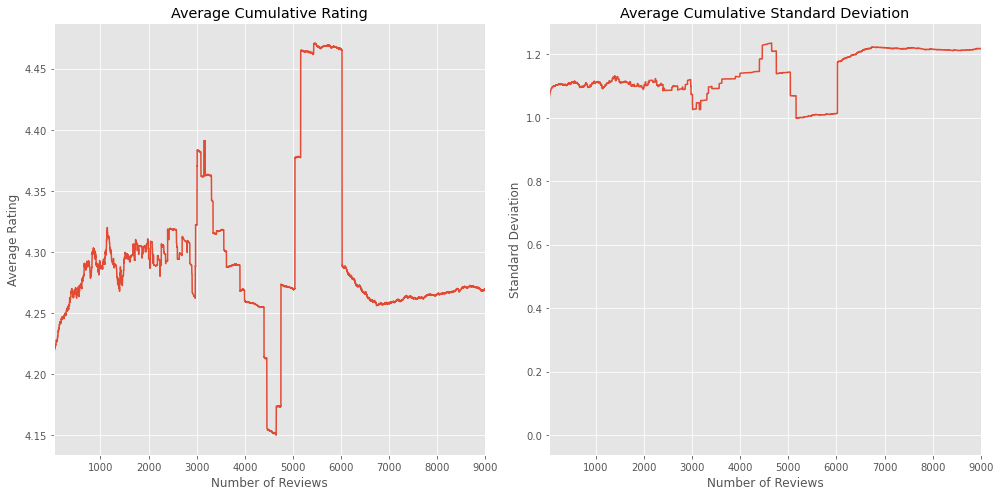

In [ ]:
# Plot the data without the 0-1
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(avg_cumulatives['cumulative_average'])
plt.title('Average Cumulative Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.xlim (25,9000)

plt.subplot(1, 2, 2)
plt.plot(avg_cumulatives['cumulative_std'])
plt.title('Average Cumulative Standard Deviation')
plt.xlabel('Number of Reviews')
plt.ylabel('Standard Deviation')
plt.xlim (25,9000)


plt.tight_layout()
plt.show()


25-100       64909
101-200       9827
201-400       3946
401-600        987
601-1000       535
1001-2000      224
2001-3000       37
3001-4000       12
4001-5000        4
Name: review_bin, dtype: int64


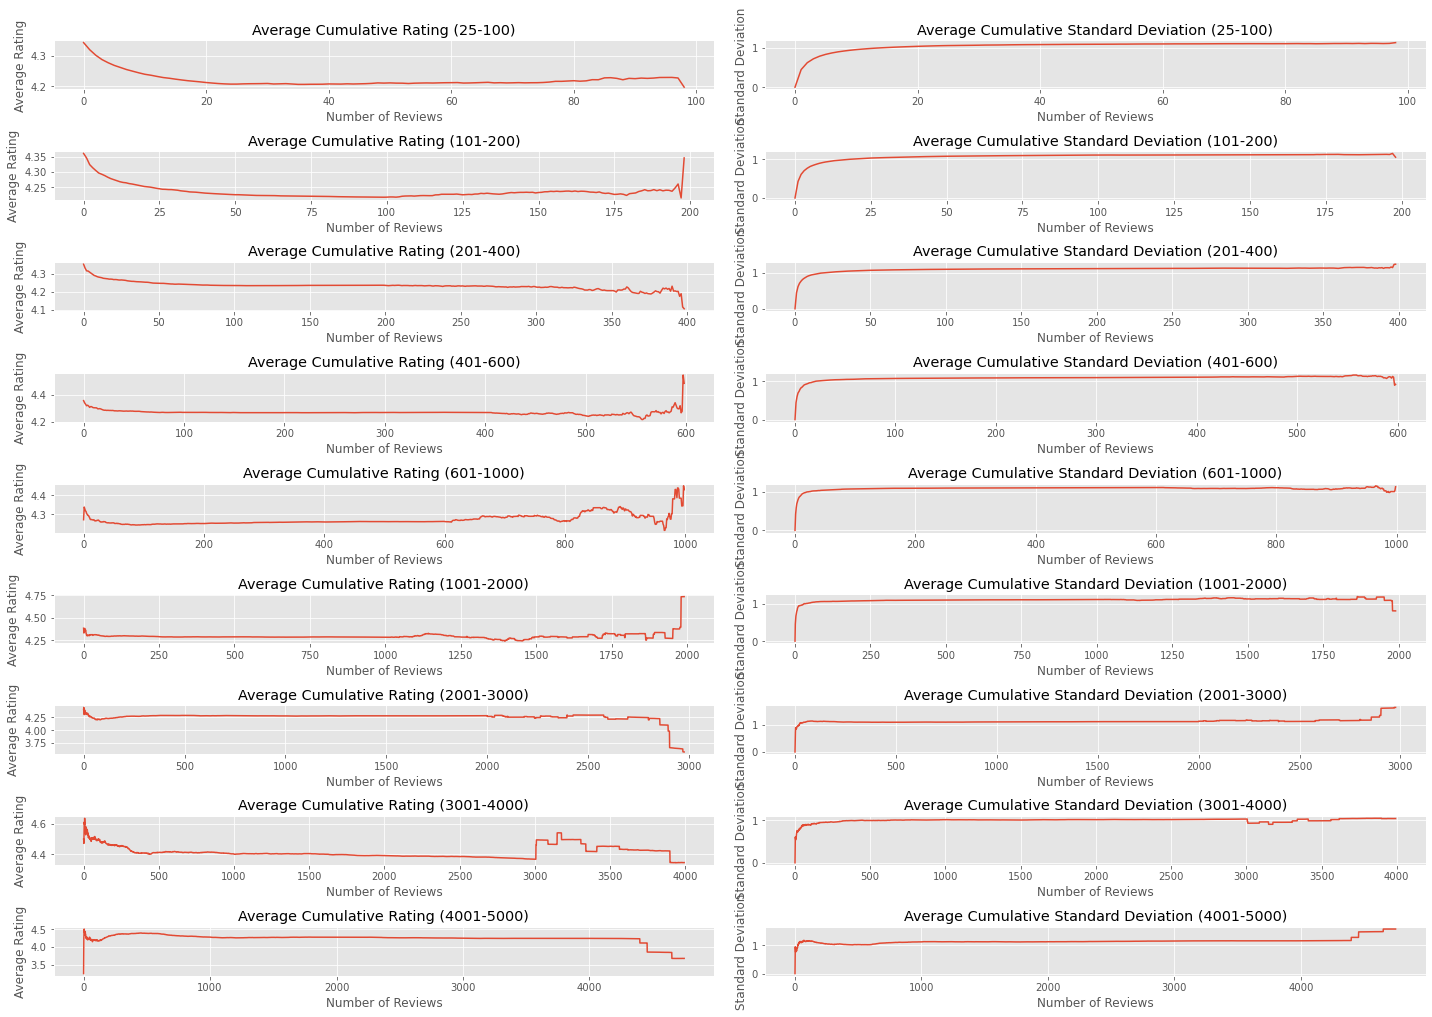

In [ ]:
# Define the bins and their labels
bins = [25, 100, 200, 400, 600, 1000, 2000, 3000, 4000, 5000]
labels = ['25-100', '101-200', '201-400', '401-600', '601-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000']

# Create a new column 'review_bin' to segment products into groups based on total number of reviews
df_prod['review_bin'] = pd.cut(df_prod['review_id'], bins=bins, labels=labels, right=False)

# Count how many products are in each group
product_counts = df_prod['review_bin'].value_counts().reindex(labels)
print(product_counts)

# Define a function to compute average cumulative statistics for each bin
def compute_avg_cumulative(df_group):
    max_len = max(df_group['cumulative_average'].apply(len))
    cumulative_average_sum = np.zeros(max_len)
    cumulative_std_sum = np.zeros(max_len)
    cumulative_count = np.zeros(max_len, dtype=int)

    for _, row in df_group.iterrows():
        lengths = len(row['cumulative_average'])
        cumulative_average_sum[:lengths] += row['cumulative_average']
        cumulative_std_sum[:lengths] += row['cumulative_std']
        cumulative_count[:lengths] += 1

    avg_cumulative_average = cumulative_average_sum / cumulative_count
    avg_cumulative_std = cumulative_std_sum / cumulative_count
    
    return avg_cumulative_average, avg_cumulative_std

# Plot the data
plt.figure(figsize=(20, 14))

for index, label in enumerate(labels):
    df_group = df_prod[df_prod['review_bin'] == label]
    avg_cumulative_average, avg_cumulative_std = compute_avg_cumulative(df_group)

    # Average Cumulative Rating plot
    plt.subplot(len(labels), 2, 2*index + 1)
    plt.plot(avg_cumulative_average)
    plt.title(f'Average Cumulative Rating ({label})')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Average Rating')

    # Average Cumulative Standard Deviation plot
    plt.subplot(len(labels), 2, 2*index + 2)
    plt.plot(avg_cumulative_std)
    plt.title(f'Average Cumulative Standard Deviation ({label})')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()


C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))


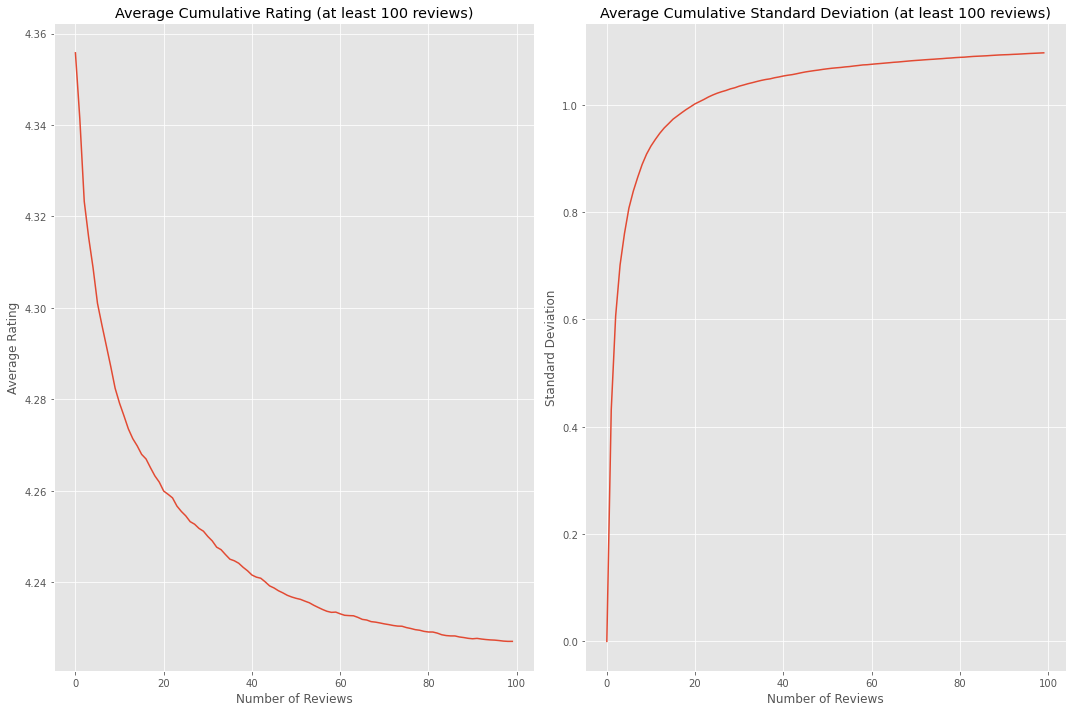

C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))


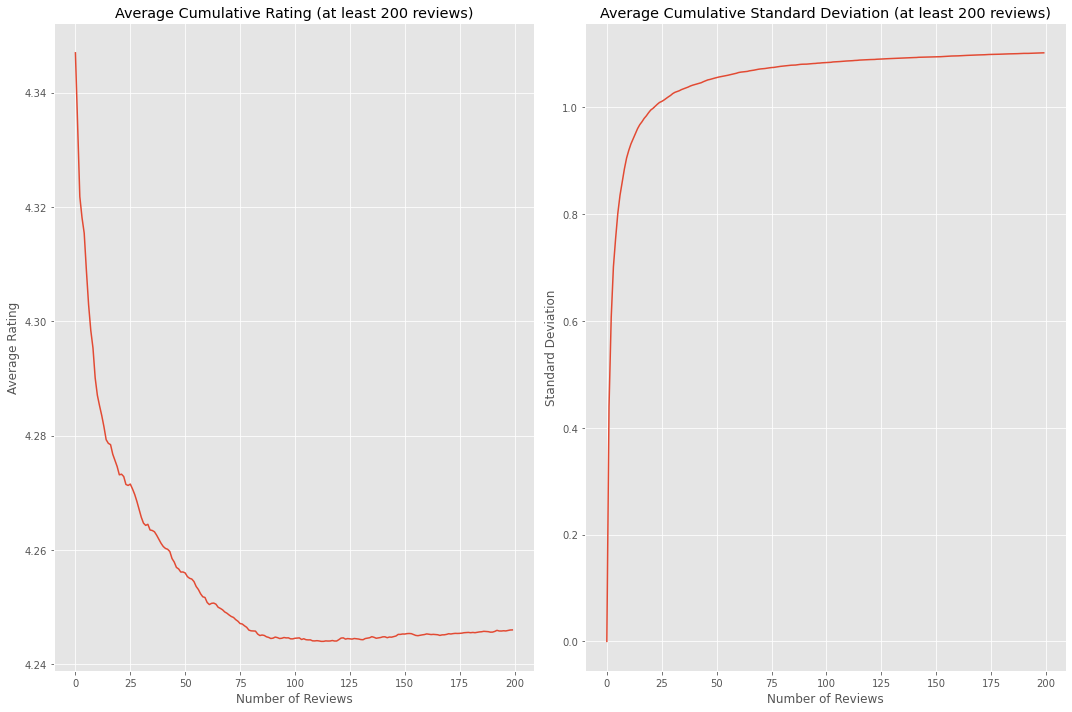

C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))


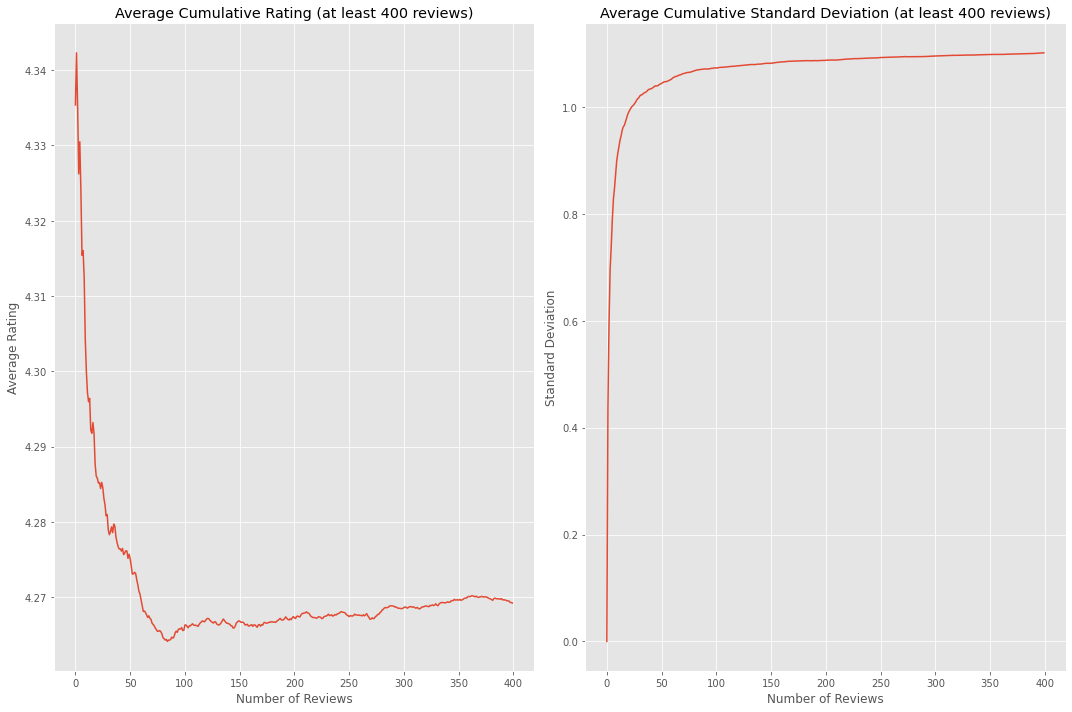

C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))


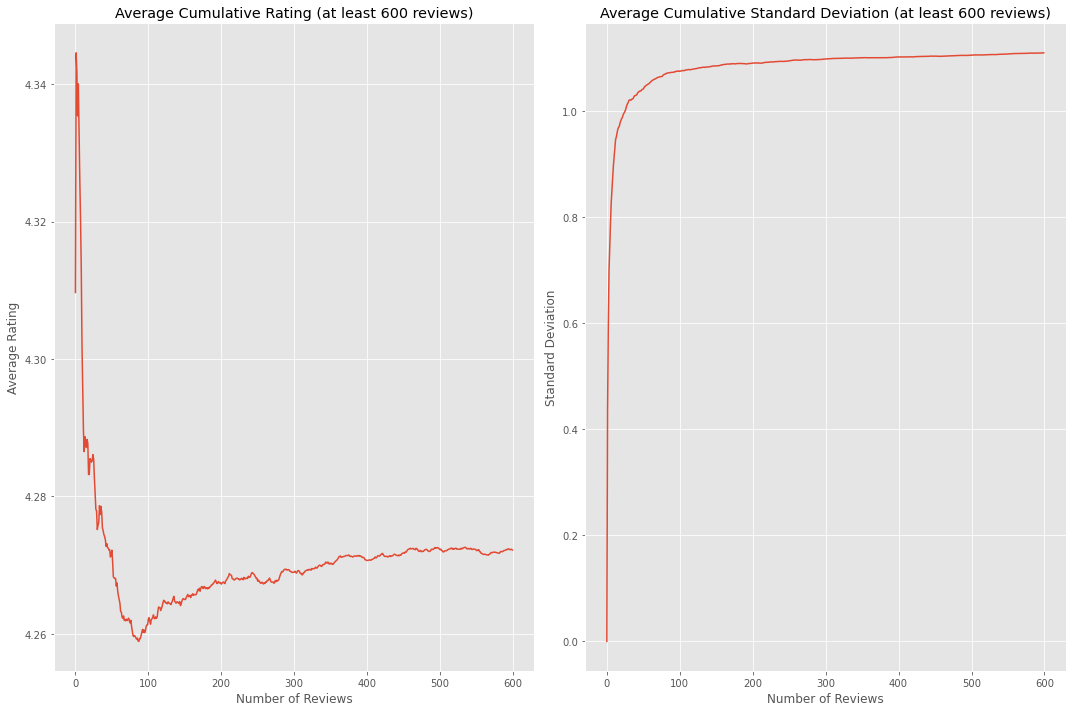

C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))


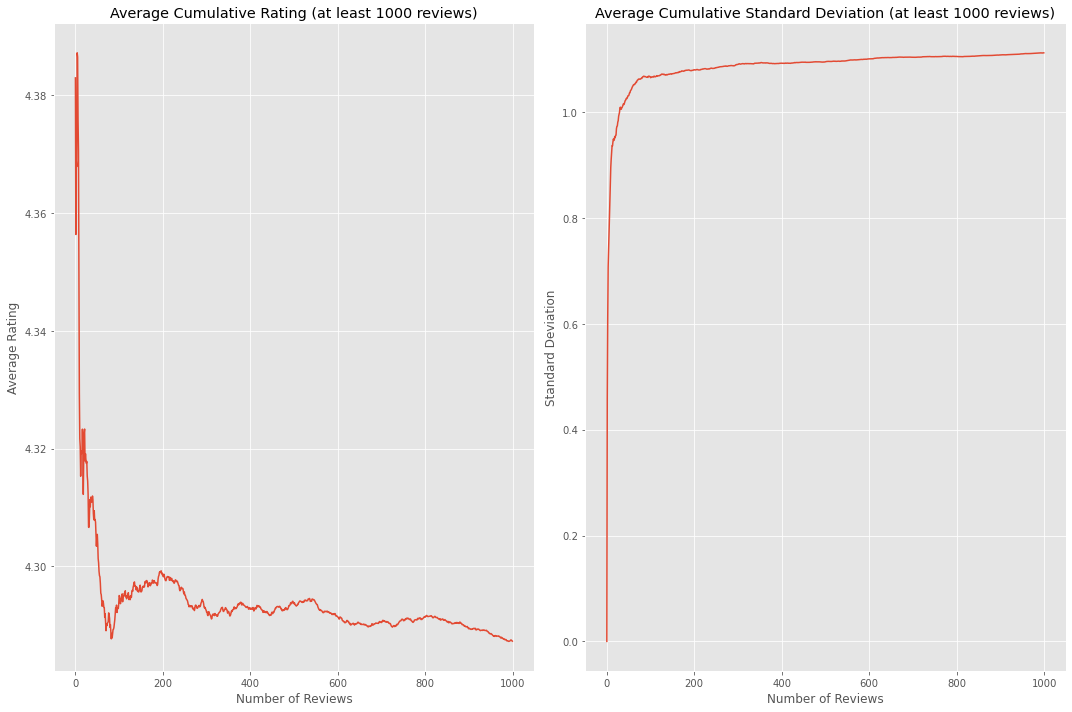

C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))


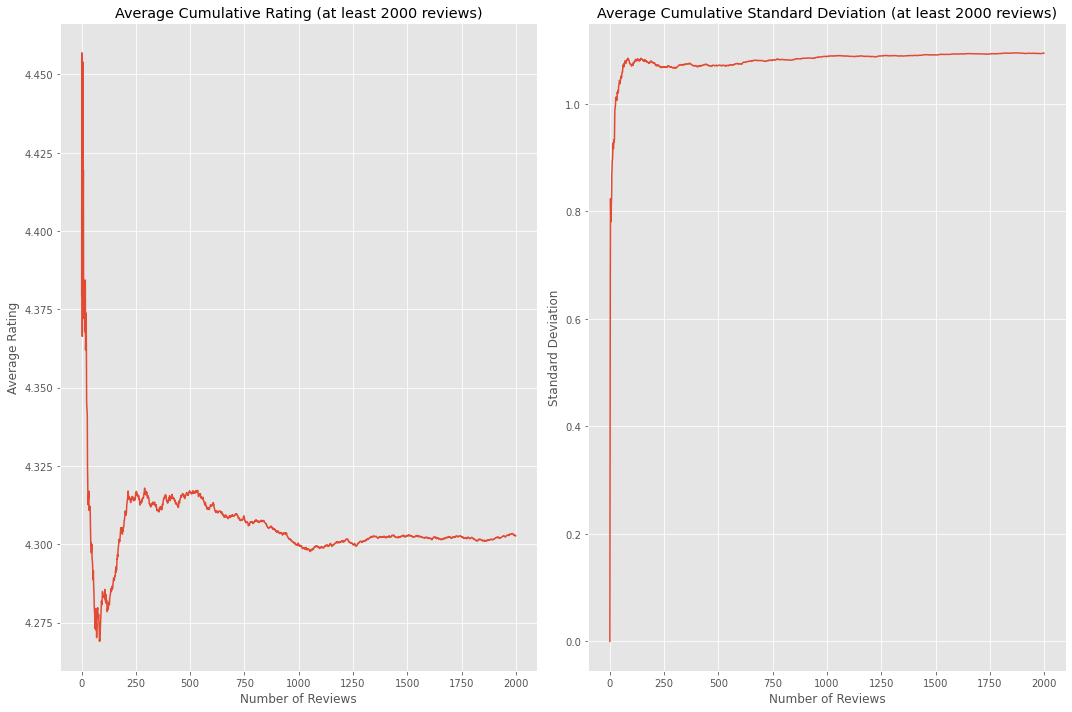

C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))


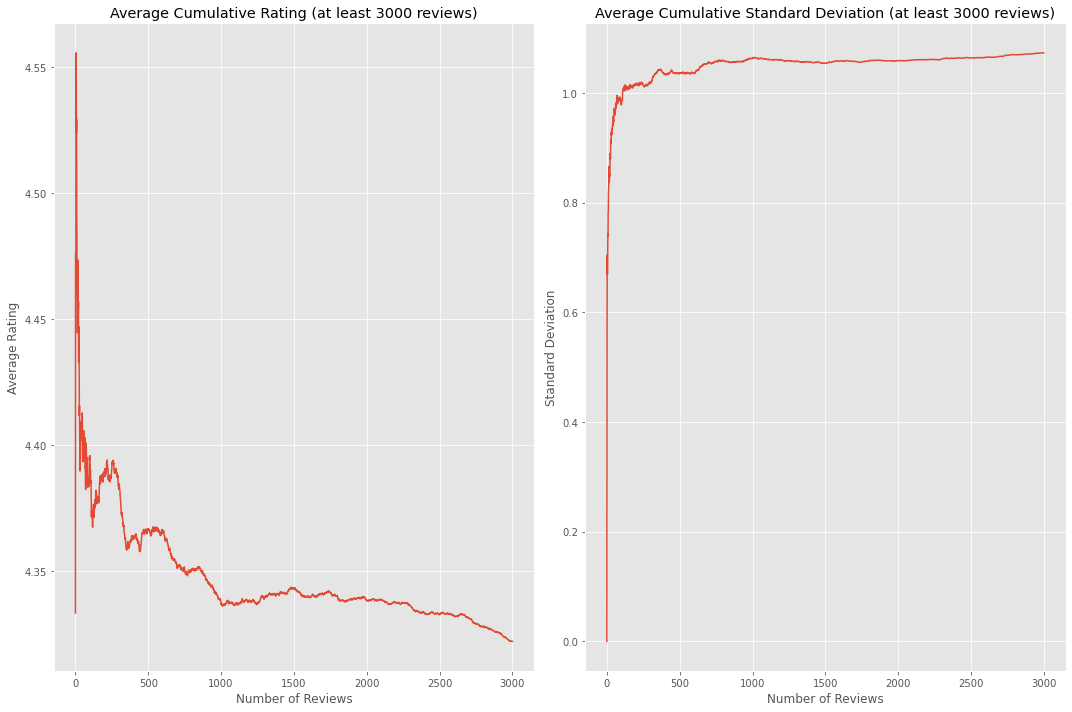

C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))


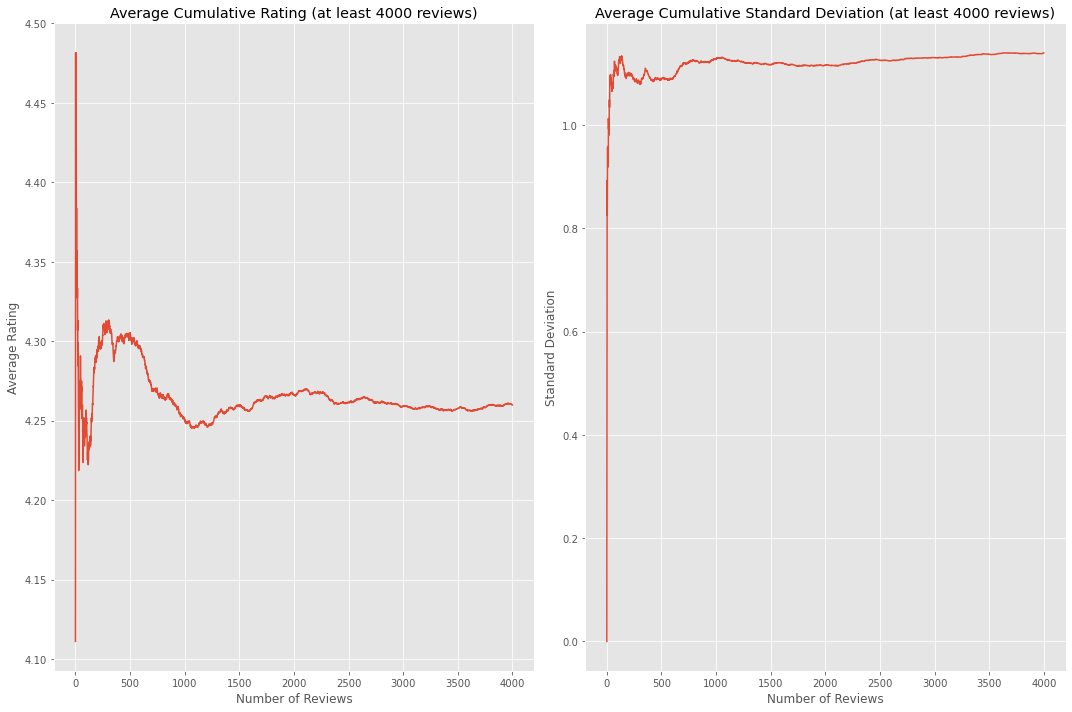

C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
C:\Users\willf\AppData\Local\Temp\ipykernel_2776\4135840223.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))


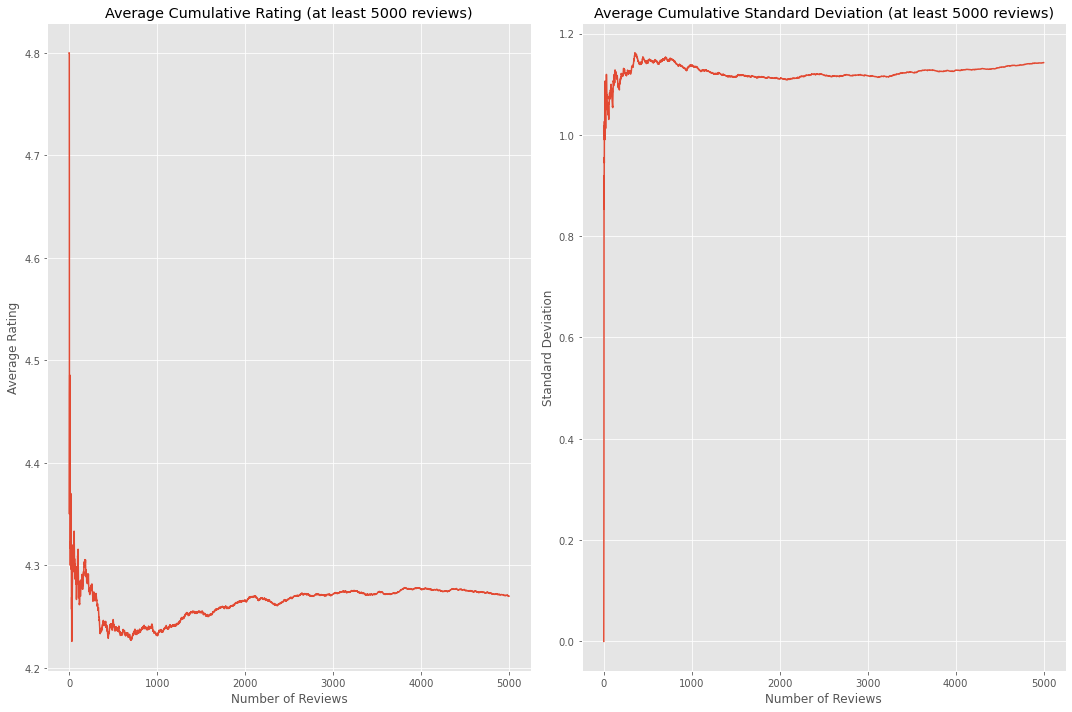

In [ ]:
# Look at review scores and standard deviations for each cohort separately

df = combined_df.copy()

# Convert star_rating to numeric and remove any invalid rows
df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')
df = df.dropna(subset=['star_rating'])

# Sort by product_id and review_date
df = df.sort_values(by=['product_id', 'review_date'])

# Group and aggregate functions
df_prod = df.groupby('product_id').agg({
    'review_id': 'count',
    'star_rating': list
}).reset_index()

review_thresholds = [100, 200, 400, 600, 1000, 2000, 3000, 4000, 5000]

# Iterate through threshold bins and calculate their avg cumulative rating and standard deviations
for threshold in review_thresholds:
    # Filter to review threshold bin
    subset_df = df_prod[df_prod['review_id'] >= threshold]

    # Calc cumulative avg and standard dev per product
    subset_df['cumulative_average'] = subset_df['star_rating'].apply(lambda x: np.cumsum(x) / np.arange(1, len(x) + 1))
    subset_df['cumulative_std'] = subset_df['star_rating'].apply(lambda x: np.array([np.std(x[:i+1]) for i in range(len(x))]))

    
    max_len = subset_df['star_rating'].apply(len).max()

    # Create arrays of zeros with length of all star ratings in the bin
    cumulative_average_sum = np.zeros(max_len)
    cumulative_std_sum = np.zeros(max_len)
    cumulative_count = np.zeros(max_len, dtype=int)

    # Calc avg rating and standard deviations across all products in the bin
    for index, row in subset_df.iterrows():
        lengths = len(row['cumulative_average'])
        cumulative_average_sum[:lengths] += row['cumulative_average']
        cumulative_std_sum[:lengths] += row['cumulative_std']
        cumulative_count[:lengths] += 1

    avg_cumulative_average = cumulative_average_sum / cumulative_count
    avg_cumulative_std = cumulative_std_sum / cumulative_count

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))  
    ax1.plot(avg_cumulative_average[:threshold])
    ax1.set_title(f'Average Cumulative Rating (at least {threshold} reviews)')
    ax1.set_xlabel('Number of Reviews')
    ax1.set_ylabel('Average Rating')

    ax2.plot(avg_cumulative_std[:threshold])
    ax2.set_title(f'Average Cumulative Standard Deviation (at least {threshold} reviews)')
    ax2.set_xlabel('Number of Reviews')
    ax2.set_ylabel('Standard Deviation')

    plt.tight_layout()
    plt.show()


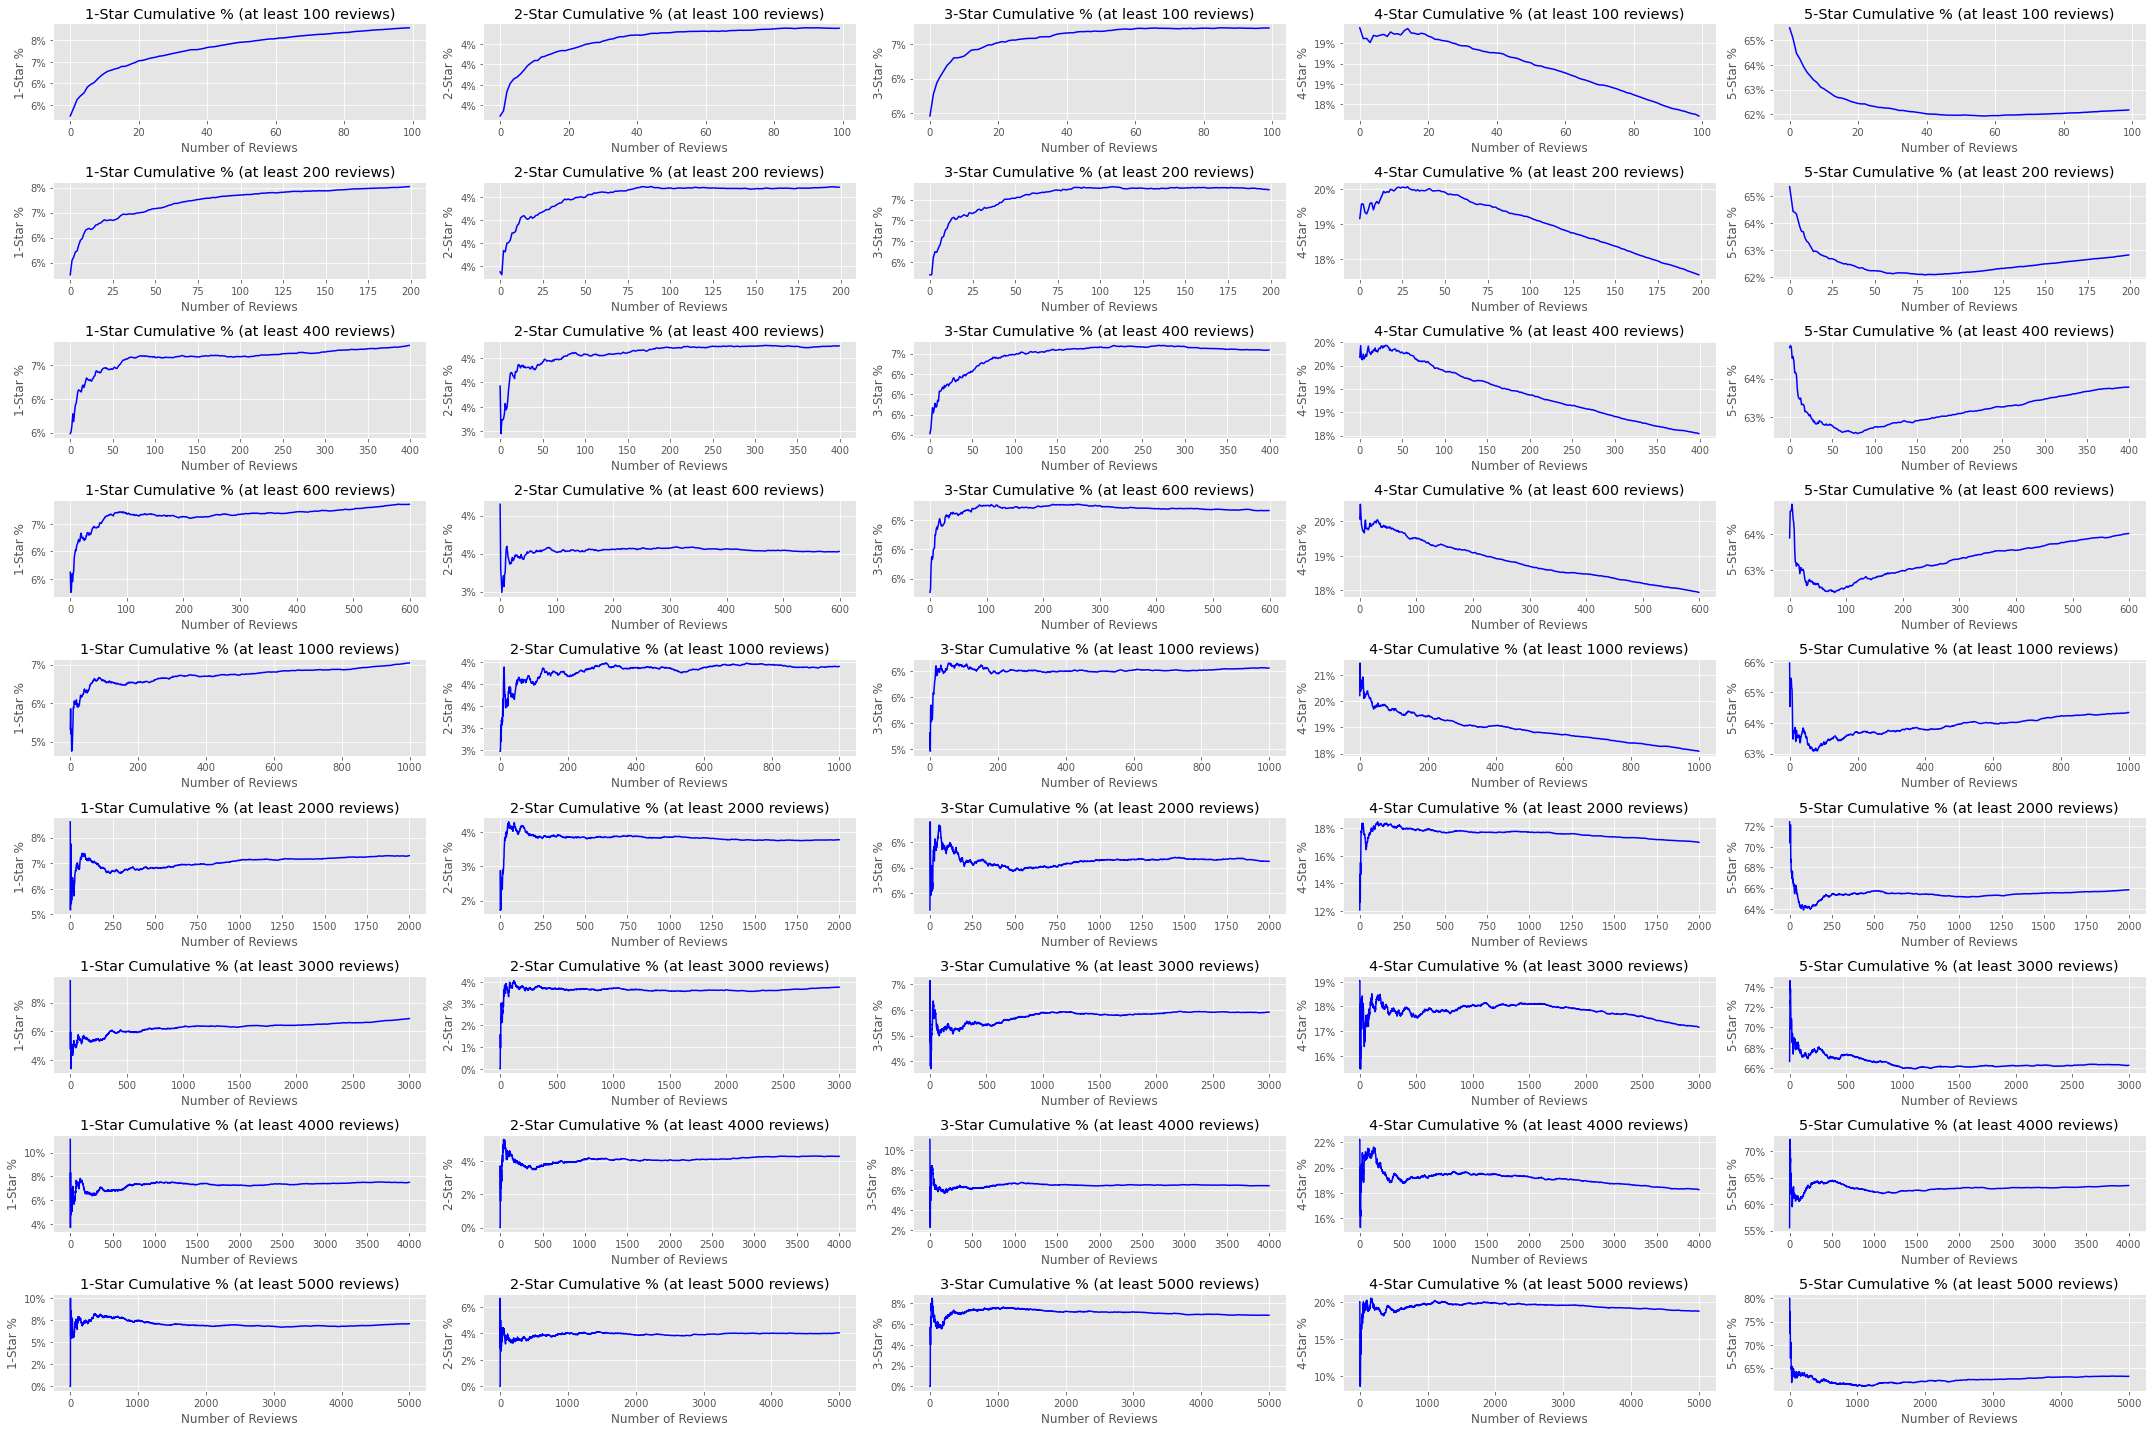

In [ ]:
# Now show as percentage of total
from matplotlib.ticker import FixedLocator

df = combined_df.copy()

# Sorting and clean up
df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')
df = df.dropna(subset=['star_rating'])
df = df.sort_values(by=['product_id', 'review_date'])

# Group and aggregate functions
df_prod = df.groupby('product_id').agg({
    'review_id': 'count',
    'star_rating': list
}).reset_index()

def calculate_cumulative_percent(rating_list, rating_value):
    return np.cumsum(np.array(rating_list) == rating_value) / np.arange(1, len(rating_list) + 1)

review_thresholds = [100, 200, 400, 600, 1000, 2000, 3000, 4000, 5000]

# Create multi chart plot
fig, axes = plt.subplots(len(review_thresholds), 5, figsize=(30, 20))

# Iterate through review_threshold bins
for i, threshold in enumerate(review_thresholds):

    subset_df = df_prod[df_prod['review_id'] >= threshold].copy()
    max_len = subset_df['star_rating'].apply(len).max()

    # Calc cumulative percentages for each star rating
    for rating in range(1, 6):
        subset_df.loc[:, f'cumulative_percent_{rating}'] = subset_df['star_rating'].apply(lambda x: calculate_cumulative_percent(x, rating))

        cumulative_sum = np.zeros(max_len)
        cumulative_count = np.zeros(max_len, dtype=int)

        # Average across all products in the threshold bin
        for index, row in subset_df.iterrows():
            lengths = len(row[f'cumulative_percent_{rating}'])
            cumulative_sum[:lengths] += row[f'cumulative_percent_{rating}']
            cumulative_count[:lengths] += 1

        avg_cumulative_percent = cumulative_sum / cumulative_count
        
        # Plot
        ax = axes[i, rating-1]
        ax.plot(avg_cumulative_percent[:threshold], color='blue')  # Set the color to blue
        ax.set_title(f'{rating}-Star Cumulative % (at least {threshold} reviews)')
        ax.set_xlabel('Number of Reviews')
        ax.set_ylabel(f'{rating}-Star %')
        
        ax.yaxis.set_major_locator(FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(['{:.0f}%'.format(val*100) for val in ax.get_yticks()])

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Comparison of products ranked by avg star-rating (highest to lowest) before and after removing 1-star and 5-star reviews

df = combined_df.copy()

df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')
df = df.dropna(subset=['star_rating'])

# Filter to over 200 reviews & 2, 3, or 4-star
filtered_df = df[df['star_rating'].isin([2,3,4])]
review_counts = filtered_df.groupby('product_id').size()
products_over_200_reviews = review_counts[review_counts > 200].index

subset_df = df[df['product_id'].isin(products_over_200_reviews)]

# Rank products by avg star_rating
overall_ranking = subset_df.groupby('product_id')['star_rating'].mean().sort_values(ascending=False).reset_index()
overall_ranking['overall_rank'] = overall_ranking['star_rating'].rank(ascending=False)
overall_ranking['review_count'] = subset_df.groupby('product_id').size().reset_index(name='review_count')['review_count']

# Rank by avg star_rating without 1-star and 5-star reviews
filtered_subset = subset_df[~subset_df['star_rating'].isin([1,5])]
filtered_ranking = filtered_subset.groupby('product_id')['star_rating'].mean().sort_values(ascending=False).reset_index()
filtered_ranking['filtered_rank'] = filtered_ranking['star_rating'].rank(ascending=False)

# Merge to see how many rank spots a product moved from all ratings avg to 2-4 ratings avg
merged_rankings = overall_ranking.merge(filtered_ranking, on='product_id', how='left', suffixes=('_overall', '_filtered'))
merged_rankings['rank_change'] = merged_rankings['overall_rank'] - merged_rankings['filtered_rank']


# Calc rank change as a percentage of all ranks
merged_rankings['rank_change_percentage'] = (merged_rankings['rank_change'] / (len(merged_rankings)-1)) * 100
average_percentage_change = merged_rankings['rank_change_percentage'].abs().mean()


print(f"Average Percentage Rank Change: {average_percentage_change:.2f}%")
merged_rankings[['product_id', 'review_count', 'rank_change_percentage']]


Average Percentage Rank Change: 11.29%


,product_id,review_count,rank_change_percentage
0,B0050R67U0,824,-13.824885
1,B001S2PPT0,776,-0.614439
2,B00FA2RLX2,969,-1.075269
3,B00068XCQU,935,-3.379416
4,B001E1Y5O6,685,-11.981567
...,...,...,...
647,B000YM2OIK,1142,0.768049
648,B00EY24CCC,524,0.460829
649,B0061R1XI4,1201,1.382488
650,B0045S2JE8,836,3.840246


In [ ]:
# Does this rank change differ between products with a high number of reviews and those with a low number? (answer = No)

merged_rankings['abs_rank_change_percentage'] = merged_rankings['rank_change_percentage'].abs()
correlation = merged_rankings['review_count'].corr(merged_rankings['abs_rank_change_percentage'])

print(f"Correlation between review_count and absolute rank_change_percentage: {correlation:.2f}")

Correlation between review_count and absolute rank_change_percentage: 0.02


In [ ]:
# Do lower rated products change more than higher-rated products in above rank change?

# Create high- and low-rated groups
high_rated_products = merged_rankings[merged_rankings['star_rating_overall'] >= 4.3]
low_rated_products = merged_rankings[merged_rankings['star_rating_overall'] < 4.0]

# Calc avg rank change percentage per group
average_percentage_change_high = high_rated_products['rank_change_percentage'].abs().mean()
average_percentage_change_low = low_rated_products['rank_change_percentage'].abs().mean()


print(f"Average Percentage Rank Change for High Rated Products (>= 4.3): {average_percentage_change_high:.2f}%")
print(f"Average Percentage Rank Change for Low Rated Products (< 4.0): {average_percentage_change_low:.2f}%")


Average Percentage Rank Change for High Rated Products (>= 4.3): 11.69%
Average Percentage Rank Change for Low Rated Products (< 4.0): 9.53%


In [ ]:
# This is an attempt to compare products' distribution of star ratings to see if there are abnormally distributed products

# Calc overall distribution for all products
overall_proportions = df_filt_100['star_rating'].value_counts(normalize=True).sort_index()

# Calc distribution for each product
product_distributions = df_filt_100.groupby('product_id')['star_rating'].value_counts().unstack(fill_value=0)

# Normalize
product_distributions_normalized = product_distributions.div(product_distributions.sum(axis=1), axis=0)

chi2_results = []

# Iterate through products to calculate chi-squared and p-values
for product, distribution in product_distributions_normalized.iterrows():
    expected_counts = overall_proportions * product_distributions.loc[product].sum()
    chi2_stat, p_val = chisquare(distribution.values * product_distributions.loc[product].sum(), expected_counts)
    chi2_results.append((product, chi2_stat, p_val))

# Create a chi-squared dataframe
chi2_df = pd.DataFrame(chi2_results, columns=['product_id', 'chi2_stat', 'p_val'])

print(chi2_df)


       product_id  chi2_stat         p_val
0      0439893577  10.430637  3.376597e-02
1      0528959948   6.766543  1.487518e-01
2      0739007432  11.024765  2.628710e-02
3      098949232X  88.871579  2.286546e-18
4      0989528391  70.977852  1.410966e-14
...           ...        ...           ...
15388  B00X8MRBCW  41.969752  1.692420e-08
15389  B00XMK7YM2  13.624669  8.594517e-03
15390  B00ZGQD4GU   5.141041  2.731296e-01
15391  B011IFF71C  71.288605  1.213061e-14
15392  B014G3WI10  10.656169  3.071246e-02

[15393 rows x 3 columns]


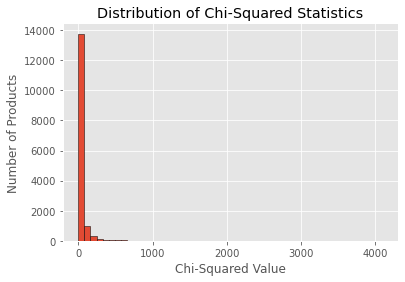

Number of products with significant distribution difference: 11494
Total Products: 15393
Products with Significant Distribution Difference: 11494
Proportion of Products with Significant Difference: 74.67%


In [ ]:
# Plot and evaluate the chi-squared data 

# Plot histogram of chi-squared per product
plt.hist(chi2_df['chi2_stat'], bins=50, edgecolor='k')
plt.title('Distribution of Chi-Squared Statistics')
plt.xlabel('Chi-Squared Value')
plt.ylabel('Number of Products')
plt.show()

# count products 
significant_count = (chi2_df['p_val'] < 0.05).sum()
print(f"Number of products with significant distribution difference: {significant_count}")

# Total number of products
total_products = len(chi2_df)

# Proportion of products with significant distribution difference
proportion_significant = significant_count / total_products

print(f"Total Products: {total_products}")
print(f"Products with Significant Distribution Difference: {significant_count}")
print(f"Proportion of Products with Significant Difference: {proportion_significant:.2%}")


In [ ]:
# Calculate the share of the avg rating for a product that is due to 1-star and 5-star reviews
# Calculate counts for each star rating
star_counts = df_filt_100['star_rating'].value_counts()

# Calculate total "score" contributed by each star rating
total_score = sum(star * star_counts[star] for star in range(1, 6))

# Calculate total "score" contributed by 1-star and 5-star reviews
score_1_and_5 = 1 * star_counts[1] + 5 * star_counts[5]

# Calculate the overall average review score
average_score = total_score / len(df_filt_100)

# Calculate the percentage contribution of 1-star and 5-star reviews to the average score
percentage_contribution_1_and_5 = (score_1_and_5 / total_score) * 100

print(f"Percentage Contribution of 1-star and 5-star Reviews: {percentage_contribution_1_and_5:.2f}%")


Percentage Contribution of 1-star and 5-star Reviews: 76.65%


NameError: name 'mticker' is not defined

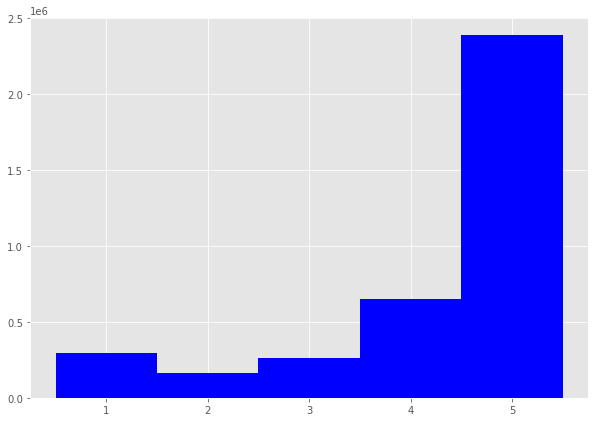

In [18]:

df = combined_df.copy()

df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')
df = df.dropna(subset=['star_rating'])

product_counts = optimized_df.groupby('product_id').size()
products_over_100 = product_counts[product_counts > 100]

df_filt_100 = optimized_df[optimized_df['product_id'].isin(products_over_100.index)]

bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
plt.style.use("ggplot")

plt.figure(figsize=(10, 7))

plt.hist(df_filt_100['star_rating'], bins=bins, range=(1,6), color='blue')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:.1f}M'.format(x*1e-6)))

plt.title("Histogram of Amazon Star Ratings for Utility Products (with > 100 Reviews)")
plt.xlabel("Star Rating")
plt.ylabel("Frequency")

plt.show()


15393


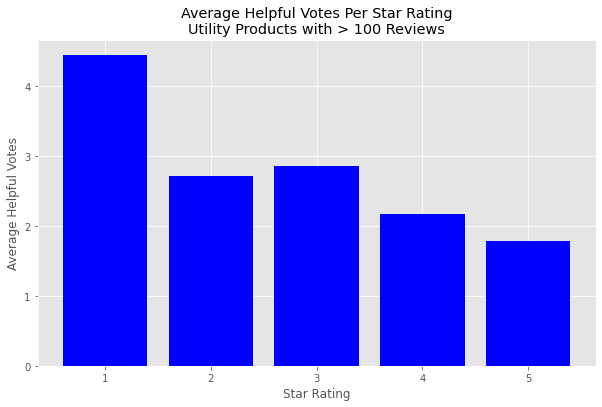

In [19]:
product_counts = optimized_df.groupby('product_id').size()
products_over_100 = product_counts[product_counts > 100]
print(len(products_over_100))
df_filt_100 = optimized_df[optimized_df['product_id'].isin(products_over_100.index)]

df_filt_100_rating = df_filt_100.groupby('star_rating')['helpful_votes'].mean()
df_filt_100_rating.head()

plt.figure(figsize=(10,6))
plt.style.use("ggplot")
plt.bar(df_filt_100_rating.index, df_filt_100_rating, color='blue')

plt.title("Average Helpful Votes Per Star Rating\nUtility Products with > 100 Reviews")
plt.xlabel("Star Rating")
plt.ylabel("Average Helpful Votes")
plt.show()

C:\Users\willf\AppData\Local\Temp\ipykernel_22236\836097798.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_reviews['star_rating'] = pd.to_numeric(long_reviews['star_rating'], errors='coerce')
C:\Users\willf\AppData\Local\Temp\ipykernel_22236\836097798.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_reviews['star_rating'] = pd.to_numeric(short_reviews['star_rating'], errors='coerce')


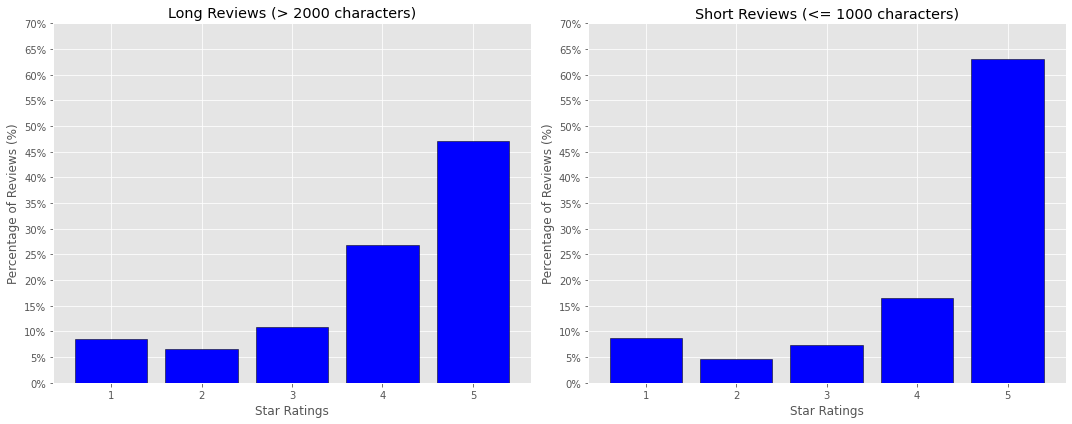

In [24]:

# Thresholds
length_threshold_long = 2000
length_threshold_short = 1000

# Filter reviews
long_reviews = optimized_df_length[optimized_df_length['review_length'] > length_threshold_long]
short_reviews = optimized_df_length[optimized_df_length['review_length'] <= length_threshold_short]

# Clean star_rating column for both
long_reviews['star_rating'] = pd.to_numeric(long_reviews['star_rating'], errors='coerce')
long_reviews = long_reviews.dropna(subset=['star_rating'])

short_reviews['star_rating'] = pd.to_numeric(short_reviews['star_rating'], errors='coerce')
short_reviews = short_reviews.dropna(subset=['star_rating'])

# Weights for normalization
weights_long = np.ones_like(long_reviews['star_rating']) / len(long_reviews)
weights_short = np.ones_like(short_reviews['star_rating']) / len(short_reviews)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Plot histogram for long reviews
axes[0].hist(long_reviews['star_rating'], bins=5, edgecolor='black', color='blue', range=(0.5, 5.5), weights=weights_long, rwidth=0.8)
axes[0].set_title(f'Long Reviews (> {length_threshold_long} characters)')
axes[0].set_xlabel('Star Ratings')
axes[0].set_ylabel('Percentage of Reviews (%)')
axes[0].set_xticks(range(1, 6))
axes[0].set_yticks([i/20 for i in range(0, 21)])
axes[0].set_yticklabels([str(i*5) + "%" for i in range(0, 21)])
axes[0].set_ylim(0,0.7)


# Plot histogram for short reviews
axes[1].hist(short_reviews['star_rating'], bins=5, edgecolor='black', color='blue', range=(0.5, 5.5), weights=weights_short, rwidth=0.8)
axes[1].set_title(f'Short Reviews (<= {length_threshold_short} characters)')
axes[1].set_xlabel('Star Ratings')
axes[1].set_ylabel('Percentage of Reviews (%)')
axes[1].set_xticks(range(1, 6))
axes[1].set_yticks([i/20 for i in range(0, 21)])
axes[1].set_yticklabels([str(i*5) + "%" for i in range(0, 21)])
axes[1].set_ylim(0,0.7)

plt.tight_layout()
plt.style.use('ggplot')
plt.show()


45989


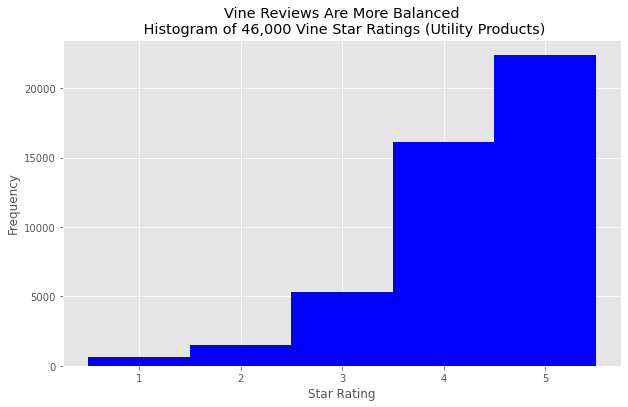

In [25]:
import matplotlib.ticker as mticker



df_vine = optimized_df[optimized_df['vine']==1]
print(df_vine.shape[0])

plt.style.use("ggplot")
plt.figure(figsize=(10,6))
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

plt.hist(df_vine['star_rating'], bins=bins, range=(1,6), color='blue')
plt.title("Vine Reviews Are More Balanced\n Histogram of 46,000 Vine Star Ratings (Utility Products)")
plt.xlabel("Star Rating")
plt.ylabel("Frequency")

plt.show()

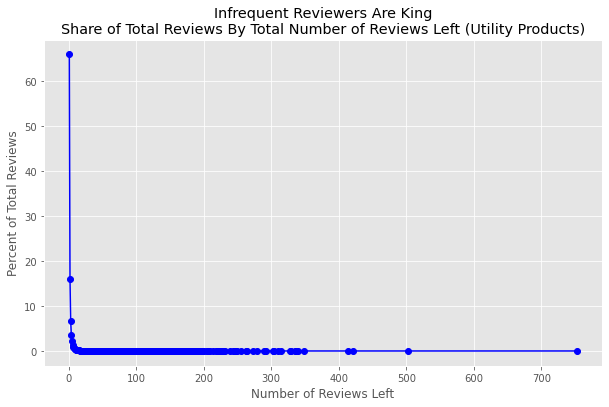

In [26]:

df_review_freq = optimized_df.groupby('customer_id').agg({
    'review_id': 'count',
    'star_rating': 'mean'
}).reset_index().fillna(0)

df_freq_trend = df_review_freq.groupby('review_id')['customer_id'].count().reset_index()
df_freq_trend['percentage'] = (df_freq_trend['customer_id'] / df_freq_trend['customer_id'].sum()) * 100
df_freq_trend.head()

plt.figure(figsize=(10,6))
plt.plot(df_freq_trend['review_id'], df_freq_trend['percentage'], marker='o', linestyle='-', color='blue')

plt.xlabel('Number of Reviews Left')
plt.ylabel("Percent of Total Reviews")
plt.title(f"Infrequent Reviewers Are King\nShare of Total Reviews By Total Number of Reviews Left (Utility Products)")
plt.xticks(range(0,max(df_freq_trend['review_id'])+1,100))
plt.style.use("ggplot")
plt.show()

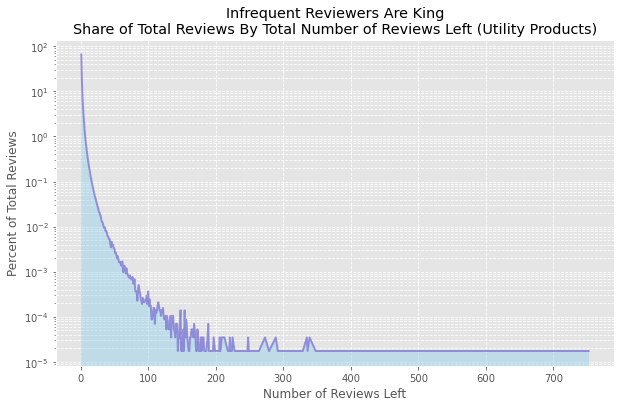

In [27]:
# Plot share of total reviews by number of reviews left as area chart with log scale
plt.figure(figsize=(10,6))

plt.fill_between(df_freq_trend['review_id'], df_freq_trend['percentage'], color="skyblue", alpha=0.4)
plt.plot(df_freq_trend['review_id'], df_freq_trend['percentage'], color="Slateblue", alpha=0.6, linewidth=2)

plt.xlabel('Number of Reviews Left')
plt.ylabel("Percent of Total Reviews")
plt.title(f"Infrequent Reviewers Are King\nShare of Total Reviews By Total Number of Reviews Left (Utility Products)")

plt.yscale('log')

plt.xticks(range(0, max(df_freq_trend['review_id']) + 1, 100))

plt.grid(True, which="both", ls="--") 
plt.style.use("ggplot")

plt.show()


       binned    count  percentage
0    1 review  3764027   65.838324
1   2 reviews   911996   15.952141
2   3 reviews   385559    6.743989
3   4 reviews   202714    3.545764
4   5 reviews   122042    2.134693
5   6 reviews    79166    1.384729
6  6+ reviews   251572    4.400361


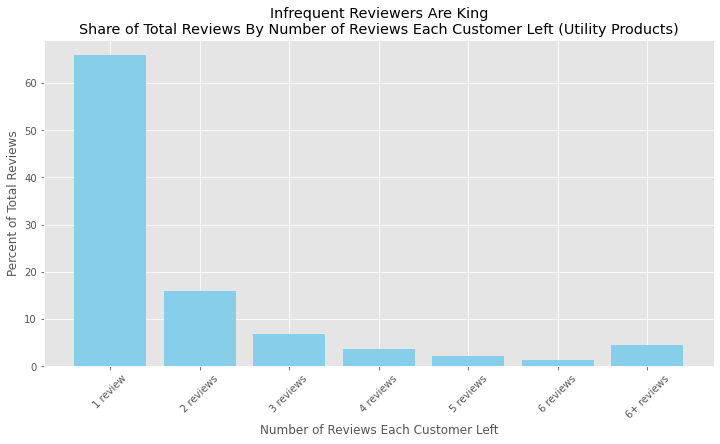

In [28]:
# Plot share of total reviews by number of reviews left as bar chart

# Create bins of 1, 2, 3...6 reviews and then 6+ reviews
bins = [1, 2, 3, 4, 5, 6, 7, float('inf')]  
bin_labels = ['1 review', '2 reviews', '3 reviews', '4 reviews', '5 reviews', '6 reviews', '6+ reviews']

df_review_freq['binned'] = pd.cut(df_review_freq['review_id'], bins=bins, labels=bin_labels, right=False, include_lowest=True)

df_freq_trend_binned = df_review_freq.groupby('binned').size().reset_index(name='count')
df_freq_trend_binned['percentage'] = (df_freq_trend_binned['count'] / df_review_freq.shape[0]) * 100

print(df_freq_trend_binned)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_freq_trend_binned['binned'], df_freq_trend_binned['percentage'], color='skyblue')
plt.xlabel('Number of Reviews Each Customer Left')
plt.ylabel("Percent of Total Reviews")
plt.title(f"Infrequent Reviewers Are King\nShare of Total Reviews By Number of Reviews Each Customer Left (Utility Products)")
plt.xticks(rotation=45)
plt.show()
